            0           1          2          3          4          5  \
0 -192.711049  145.729705 -53.890255  36.658830  11.450815   5.245858   
1 -229.974615  145.892416 -26.282406  35.218464   1.182397  -1.140953   
2 -274.451996  166.652534 -64.704508  33.740159   7.699390  -2.138638   
3 -177.540539  124.511261 -16.630043  29.022941  -0.337499  19.726176   
4 -161.640804  144.401239 -30.395339  30.284734  17.977034  27.195932   

           6          7          8         9         10        11         12  \
0  -2.214283   9.531785  -0.700791  0.003888   3.371869 -3.858367  -5.704730   
1  -5.079452  13.169789  -3.392527 -3.415611  -9.740481 -6.605105 -13.362653   
2   5.514648   7.013633  -2.395211  0.780717   0.967459  1.618733  -8.936951   
3  -7.623674  19.145924 -14.321300  5.189548  -7.316726  2.667932 -13.912180   
4 -17.942408   2.062636  -1.009552  3.641870 -17.932866 -0.728718   6.458162   

         13        14        15        16        17        18        19  
0 -2.9

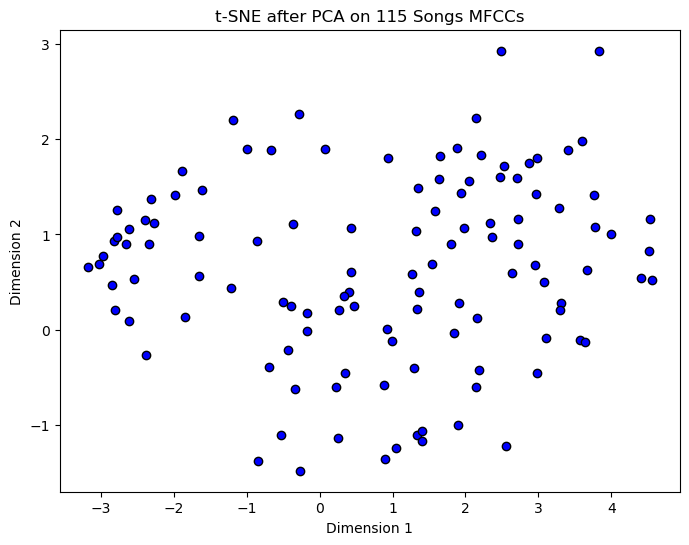

In [16]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt



import pandas as pd

mfcc_df = pd.read_csv('MFCC_Meaned_20_with_Song_Names.csv')

song_names = mfcc_df['Song']  # Save the 'Song' column
mfcc_df = mfcc_df.drop(columns=['Song'])  # Use only the MFCC coefficients for PCA and t-SNE
print(mfcc_df.head())

# Step 1: Apply PCA to reduce dimensionality to, say, 10 components


pca = PCA(n_components=10)
mfcc_pca = pca.fit_transform(mfcc_df)

# Step 2: Apply t-SNE on the reduced data from PCA
tsne = TSNE(n_components=2, perplexity=60, random_state=42)
mfcc_tsne_pca = tsne.fit_transform(mfcc_pca)

# Convert t-SNE result to a DataFrame for easy handling
mfcc_tsne_pca_df = pd.DataFrame(mfcc_tsne_pca, columns=['Dimension 1', 'Dimension 2'])


# Plot the results of t-SNE after PCA
plt.figure(figsize=(8, 6))
plt.scatter(mfcc_tsne_pca_df['Dimension 1'], mfcc_tsne_pca_df['Dimension 2'], c='blue', edgecolor='k')
plt.title('t-SNE after PCA on 115 Songs MFCCs')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

mfcc_tsne_pca_df['Song'] = song_names  # Add the 'Song' column back to the t-SNE results

mfcc_tsne_pca_df.to_csv('MFCCtsnePCA.csv')